In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('shows.csv')

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32832 entries, 0 to 32831
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               32832 non-null  object
 1   feed_url         32832 non-null  object
 2   title            31524 non-null  object
 3   subtitle         26086 non-null  object
 4   description      30082 non-null  object
 5   summary          27287 non-null  object
 6   author           30120 non-null  object
 7   email            27256 non-null  object
 8   link             15358 non-null  object
 9   language         32479 non-null  object
 10  explicit         32832 non-null  int64 
 11  image            30471 non-null  object
 12  category         30409 non-null  object
 13  subcategory      19473 non-null  object
 14  created_at       32832 non-null  object
 15  last_build_date  32832 non-null  object
dtypes: int64(1), object(15)
memory usage: 4.0+ MB


In [3]:
dataset.head()

,id,feed_url,title,subtitle,description,summary,author,email,link,language,explicit,image,category,subcategory,created_at,last_build_date
0,0002da5f-49a2-31ba-b44c-cdeabdf113cb,http://www.cbc.ca/podcasting/includes/dispatch...,Dispatches from CBC Radio,NaN,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio,podcasting@cbc.ca,http://www.cbc.ca/podcasting,en-ca,0,http://www.cbc.ca/podcasting/images/promo-disp...,News & Politics,Public Radio,2016-11-27T03:15:54,2016-11-27T03:15:54
1,00044845-beb8-35f3-99e2-01dbcfb6eb63,http://everydayissaturday.com/feed/podcast/,Motivation | Inspiration| Success with Entrepr...,Motivation - Inspiration - Success - Mindset -...,Sam Crowley delivers million dollar motivation...,Sam Crowley delivers million dollar motivation...,Sam Crowley,sam@everydayissaturday.com,http://everydayissaturday.com,en-us,0,http://everydayissaturday.com/wp-content/uploa...,Business,Business,2016-11-26T19:11:59,2016-11-21T14:19:34
2,00048bfa-8363-3f10-ac8e-8f27a31fe11f,http://disability411.jinkle.com/disability411.xml,Disability411 Podcast,NaN,Disability411 - The Podcast for Disability Inf...,NaN,Beth Case,NaN,http://disability411.jinkle.com/,en-us,0,NaN,Government & Organizations,Business,2016-11-27T00:37:30,2016-11-27T00:37:30
3,0005ab14-ea88-3038-b82c-86366713e96a,http://stevenredant.podomatic.com/rss2.xml,Steven Redant's Podcast,"Energy for your work out, your travels and you...",En example of what happened on my dance floor ...,En example of what happened on my dance floor ...,Steven Redant (the RedAnt),NaN,NaN,en-gb,0,https://assets.podomatic.net/ts/b8/34/09/steve...,Music,NaN,2016-11-26T18:37:07,2016-11-26T18:37:07
4,0005eac4-fa5d-3c33-a354-ad7928f3705b,http://api.spokenlayer.com/feed/channel/v1-wir...,WIRED News – Spoken Edition,NaN,Get in-depth coverage of current and future tr...,Get in-depth coverage of current and future tr...,WIRED,distribution@spokenlayer.com,http://www.spokenlayer.com,en,0,\n http://media.spokenlayer...,Technology,NaN,2016-11-27T06:46:08,2016-11-25T08:11:13


In [4]:
dataset.describe()

,explicit
count,32832.000000
mean,0.093202
std,0.290719
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


### Ver quais colunas contem valores nulos, e quantos são

In [19]:
dataset.isnull().sum()

id                     0
feed_url               0
title               1308
subtitle            6746
description         2750
summary             5545
author              2712
email               5576
link               17474
language             353
explicit               0
image               2361
category            2423
subcategory        13359
created_at             0
last_build_date        0
dtype: int64

### Para os valores nulos de "Subcategory", foi atribuido os valores de "Category"

In [24]:
dataset.update(dataset['subcategory'].fillna('category'))

In [25]:
dataset.isnull().sum()

id                     0
feed_url               0
title                116
subtitle            4434
description         1346
summary             3516
author               879
email               3596
link               15675
language               0
explicit               0
image                378
category               0
subcategory            0
created_at             0
last_build_date        0
dtype: int64

### Excluindo as demais linhas vazias de suas respectivas colunas

In [10]:
dataset = dataset.dropna(subset=['link'])
dataset = dataset.dropna(subset=['subtitle'])
dataset = dataset.dropna(subset=['title'])
dataset = dataset.dropna(subset=['description'])
dataset = dataset.dropna(subset=['summary'])
dataset = dataset.dropna(subset=['author'])
dataset = dataset.dropna(subset=['email'])
dataset = dataset.dropna(subset=['image'])

In [11]:
dataset.isnull().sum()

id                 0
feed_url           0
title              0
subtitle           0
description        0
summary            0
author             0
email              0
link               0
language           0
explicit           0
image              0
category           0
subcategory        0
created_at         0
last_build_date    0
dtype: int64

### Demostração de quais idiomas são mais comuns em podcasts

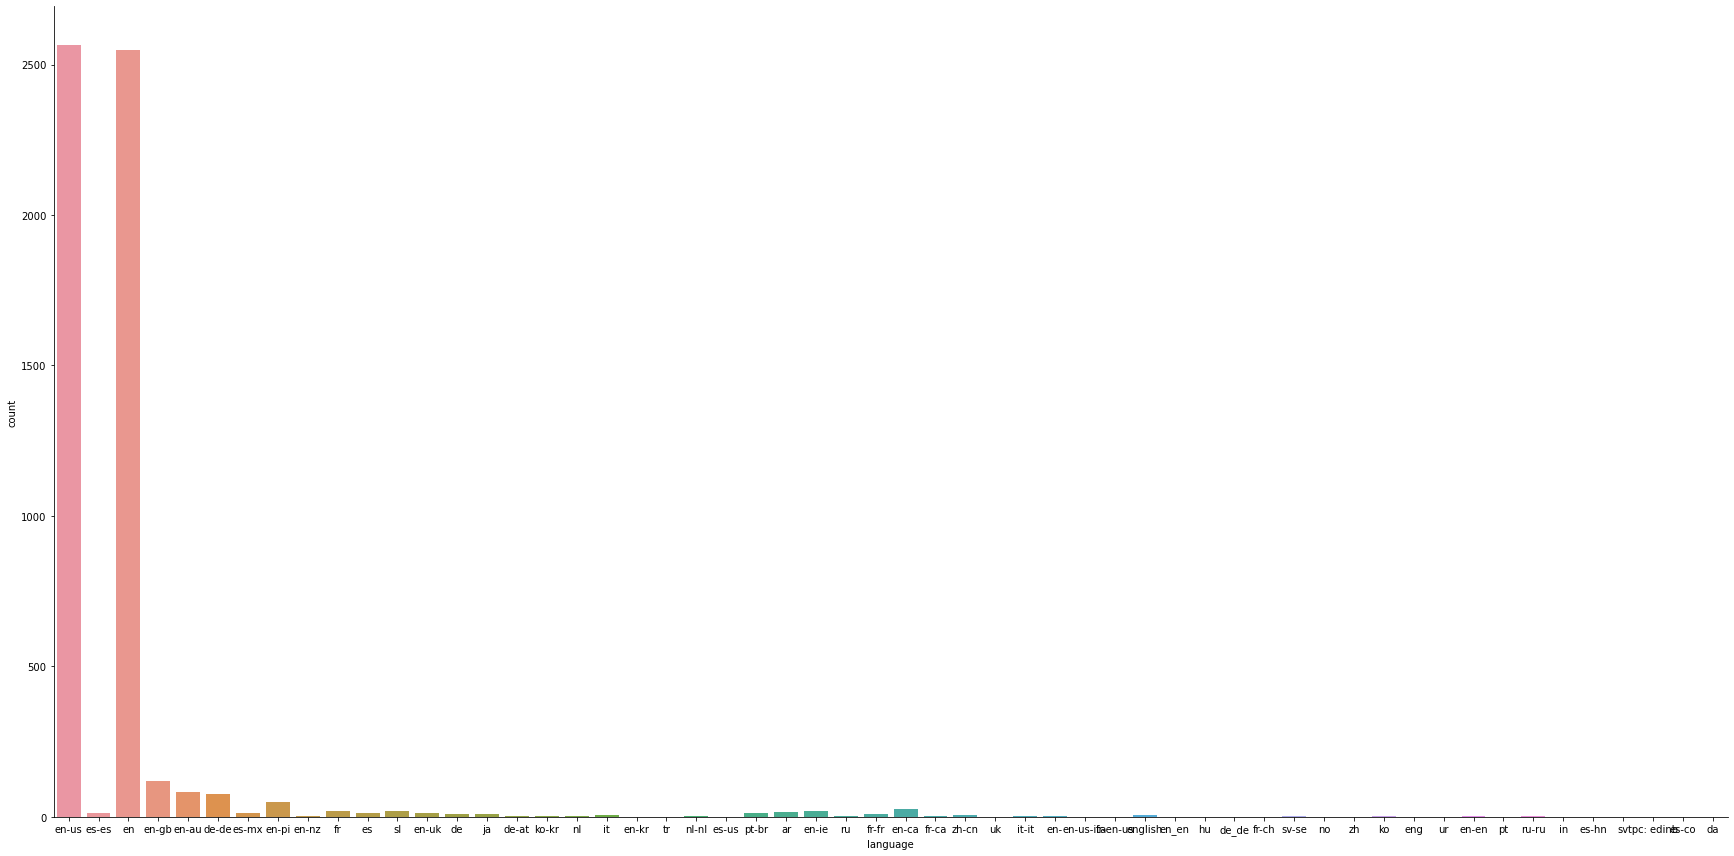

In [16]:
sns.factorplot('language', data=dataset, kind='count',size=12, aspect=2)

### Demostração de quais subcategorias são mais comuns em podcasts

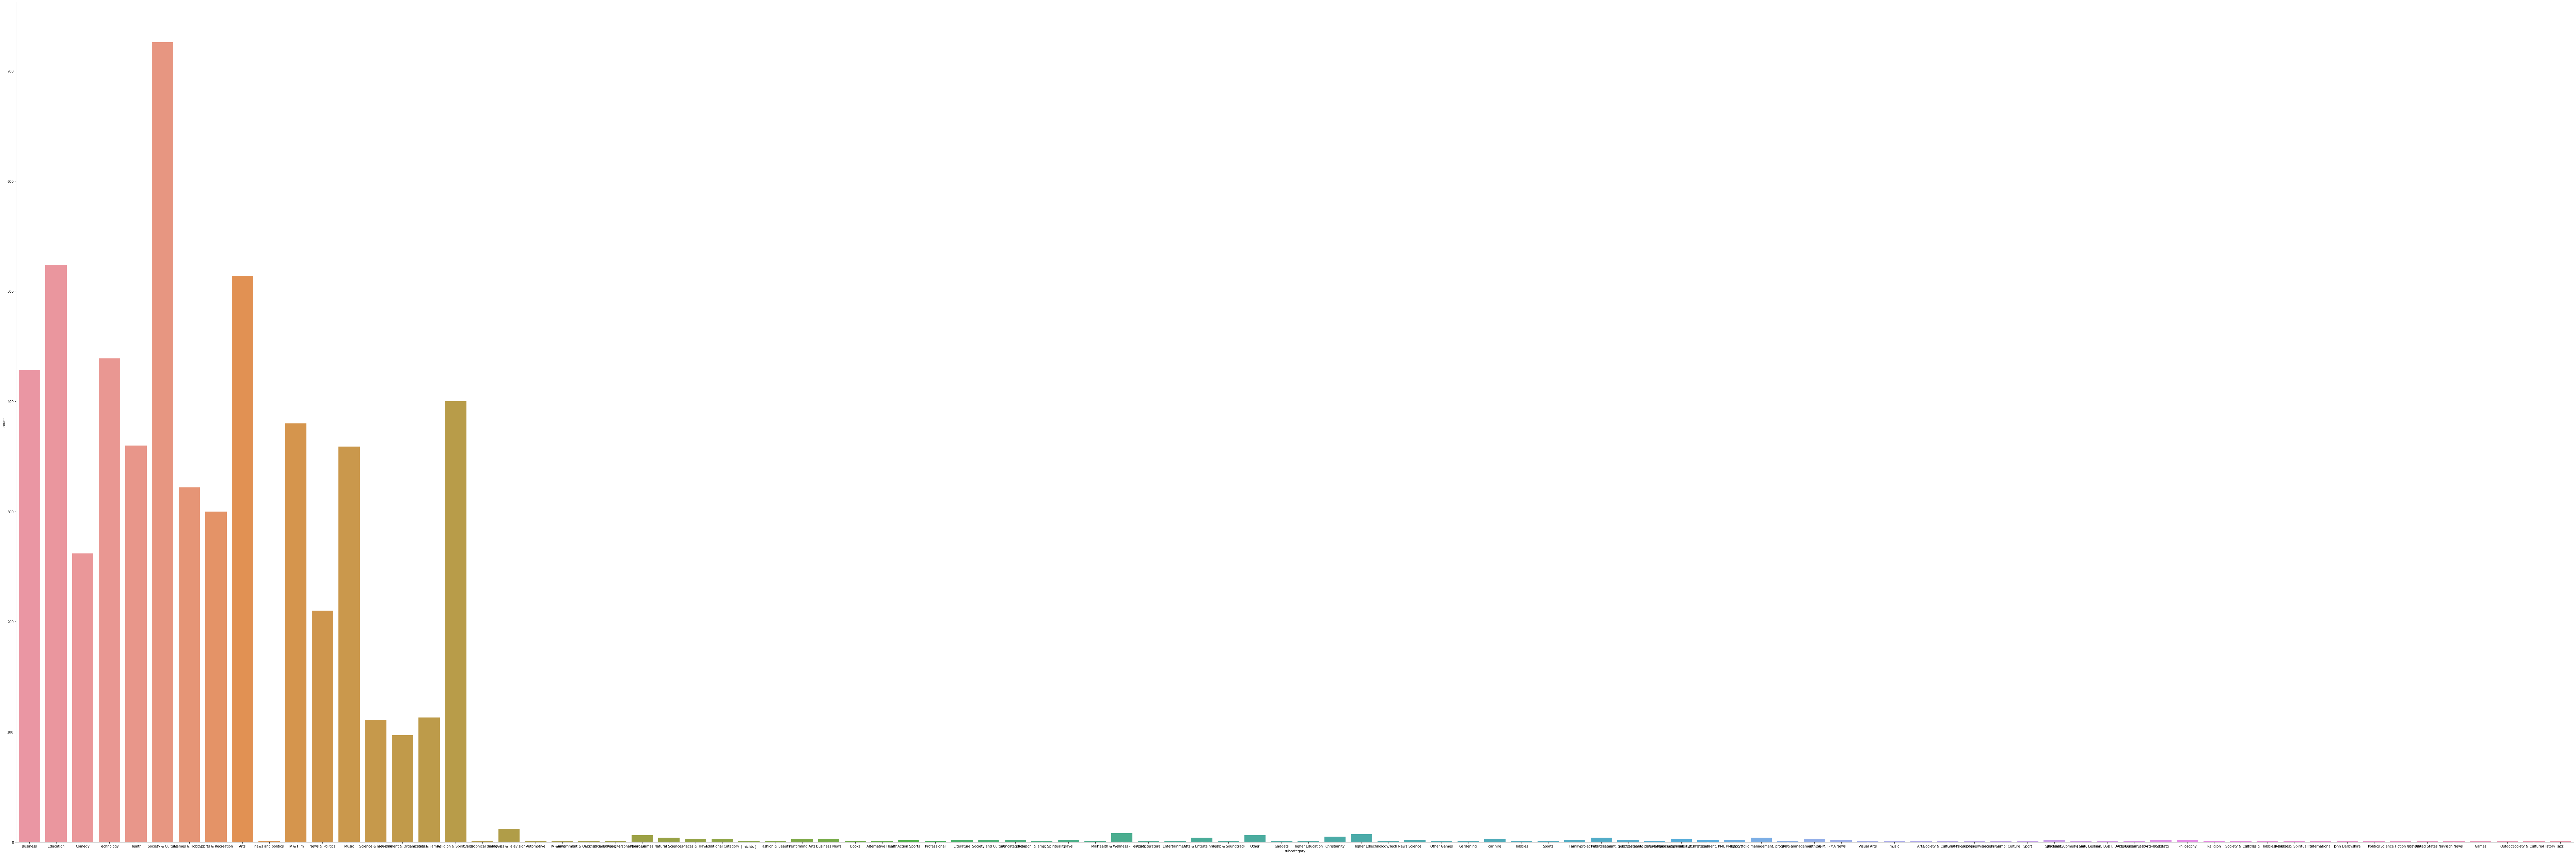

In [17]:
sns.factorplot('subcategory', data=dataset, kind='count',size=35, aspect=3)

### Demostração de quais categorias são mais comuns em podcasts

In [18]:
sns.factorplot('category', data=dataset, kind='count',size=60, aspect=3)